<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Punjab/AAP_Punjab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 610 (delta 86), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (610/610), 30.51 MiB | 22.46 MiB/s, done.
Resolving deltas: 100% (253/253), done.


In [2]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"AAP Punjab"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('AAP_Punjab.csv',index = False)

2020-11-21 17:33:51
1330202780590628864
False
@DaaruBaazMehta Encouraging. Congress maybe clueless ,but they will try hard to bring down AAP like Punjab. @AAPGoa must work harder.
AamIndian_1

Twitter for Android
2
1520
1133
1
<--------------------------------------------------->
1
2020-11-21 16:15:20
1330183020658249730
False
@spiritneeraj @AnmolGaganMan Punjab AAP need to develop more leaders, should create healthy competition among them like delhi.
Gurwinderr1983

Twitter for Android
0
349
853
0
<--------------------------------------------------->
2
2020-11-21 16:11:07
1330181958211670017
False
MUST WATCH

AAP Punjab MP @BhagwantMann Exposes BJP, SAD and Congress in Punjab.

Farmers Bill has exposed the Congress Govt and SAD. They are fooling the Farmers!! https://t.co/fOhCgsXXKj
@JarnailSinghAAP 
@AAPPunjab
AapActive123
Dilshad Garden, New Delhi
Twitter for Android
0
1888
370
0
<--------------------------------------------------->
3
2020-11-21 15:59:52
1330179129233334273
False
Me

In [3]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       197 non-null    datetime64[ns]
 1   Tweet_id   197 non-null    int64         
 2   Verified   197 non-null    bool          
 3   Tweet      197 non-null    object        
 4   User       197 non-null    object        
 5   Location   197 non-null    object        
 6   Source     197 non-null    object        
 7   Likes      197 non-null    int64         
 8   Followers  197 non-null    int64         
 9   Following  197 non-null    int64         
 10  Retweets   197 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 15.7+ KB


In [5]:
df.shape

(197, 11)

In [6]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [7]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [8]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [9]:
df['Source'].value_counts()

Twitter for Android       92
Twitter Web App           45
Twitter for iPhone        35
TweetDeck                  5
cmssocialservice           4
PB Update                  4
econ b2b post              2
IFTTT                      2
Hocalwire Social Share     2
tvpunjab                   1
Devdiscourse News Desk     1
NDTVfeed                   1
Twitter for iPad           1
namPublisher               1
Hootsuite Inc.             1
Name: Source, dtype: int64

In [10]:
df['Location'].nunique()

70

In [11]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

197

In [12]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


196

In [13]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [14]:
df['Tweet'].duplicated().sum()

1

In [15]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(196, 11)

In [16]:
df['Tweet'].duplicated().sum()

0

In [17]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [18]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [19]:
df.shape

(196, 12)

In [20]:
df['Processed_Tweet']

0      @DaaruBaazMehta Encouraging. Congress maybe cl...
1      @spiritneeraj @AnmolGaganMan Punjab AAP need t...
2      MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...
3      Met many people on ground today 90% people tol...
4      AAP Punjab youth wing president And MLA @meet_...
                             ...                        
191    @artijourno 1. If pollution isn’t good, go aft...
192    @sidharth_shukla you are a player. Apko jab la...
193    @Astute_Dopey @ng_p_f @TheMohil8 @ANI New part...
194    @ng_p_f @TheMohil8 @ANI 2022 is crucial year. ...
195    @ANI If its EVM then how did congress won in P...
Name: Processed_Tweet, Length: 196, dtype: object

In [21]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @DaaruBaazMehta Encouraging. Congress maybe cl...
1      @spiritneeraj @AnmolGaganMan Punjab AAP need t...
2      MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...
3      Met many people on ground today 90% people tol...
4      AAP Punjab youth wing president And MLA @meet_...
                             ...                        
191    @artijourno 1. If pollution isn’t good, go aft...
192    @sidharth_shukla you are a player. Apko jab la...
193    @Astute_Dopey @ng_p_f @TheMohil8 @ANI New part...
194    @ng_p_f @TheMohil8 @ANI 2022 is crucial year. ...
195    @ANI If its EVM then how did congress won in P...
Name: Processed_Tweet, Length: 196, dtype: object

In [22]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0        Encouraging. Congress maybe clueless ,but th...
1          Punjab AAP need to develop more leaders, s...
2      MUST WATCH\n\nAAP Punjab MP   Exposes BJP, SAD...
3      Met many people on ground today 90% people tol...
4      AAP Punjab youth wing president And MLA   ji o...
                             ...                        
191      1. If pollution isn’t good, go after things ...
192      you are a player. Apko jab lagta h sidnaz en...
193            New party h bhai...only formed in 2012...
194          2022 is crucial year. \n\nIf AAP wins ut...
195      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 196, dtype: object

In [23]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0        Encouraging. Congress maybe clueless ,but th...
1          Punjab AAP need to develop more leaders, s...
2      MUST WATCH\n\nAAP Punjab MP   Exposes BJP, SAD...
3      Met many people on ground today 90% people tol...
4      AAP Punjab youth wing president And MLA   ji o...
                             ...                        
191      1. If pollution isn’t good, go after things ...
192      you are a player. Apko jab lagta h sidnaz en...
193            New party h bhai...only formed in 2012...
194          2022 is crucial year. \n\nIf AAP wins ut...
195      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 196, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0        Encouraging. Congress maybe clueless ,but th...
1          Punjab AAP need to develop more leaders, s...
2      MUST WATCH\n\nAAP Punjab MP   Exposes BJP, SAD...
3      Met many people on ground today 90% people tol...
4      AAP Punjab youth wing president And MLA   ji o...
                             ...                        
191      1. If pollution isn’t good, go after things ...
192      you are a player. Apko jab lagta h sidnaz en...
193            New party h bhai...only formed in 2012...
194          2022 is crucial year. \n\nIf AAP wins ut...
195      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 196, dtype: object

In [25]:
!pip install tweet-preprocessor

In [26]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Encouraging. Congress maybe clueless ,but they...
1      Punjab AAP need to develop more leaders, shoul...
2      MUST WATCHAAP Punjab MP Exposes BJP, SAD and C...
3      Met many people on ground today % people told ...
4      AAP Punjab youth wing president And MLA ji on ...
                             ...                        
191    . If pollution isnt good, go after things that...
192    you are a player. Apko jab lagta h sidnaz enga...
193    New party h bhai...only formed in -13Chunav la...
194    is crucial year. If AAP wins uttarakhand, Goa ...
195    If its EVM then how did congress won in Punjab...
Name: Processed_Tweet, Length: 196, dtype: object

In [27]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Encouraging  Congress maybe clueless  but they...
1      Punjab AAP need to develop more leaders  shoul...
2      MUST WATCHAAP Punjab MP Exposes BJP  SAD and C...
3      Met many people on ground today   people told ...
4      AAP Punjab youth wing president And MLA ji on ...
                             ...                        
191      If pollution isnt good  go after things that...
192    you are a player  Apko jab lagta h sidnaz enga...
193    New party h bhai   only formed in    Chunav la...
194    is crucial year  If AAP wins uttarakhand  Goa ...
195    If its EVM then how did congress won in Punjab...
Name: Processed_Tweet, Length: 196, dtype: object

In [28]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      encouraging  congress maybe clueless  but they...
1      punjab aap need to develop more leaders  shoul...
2      must watchaap punjab mp exposes bjp  sad and c...
3      met many people on ground today   people told ...
4      aap punjab youth wing president and mla ji on ...
                             ...                        
191      if pollution isnt good  go after things that...
192    you are a player  apko jab lagta h sidnaz enga...
193    new party h bhai   only formed in    chunav la...
194    is crucial year  if aap wins uttarakhand  goa ...
195    if its evm then how did congress won in punjab...
Name: Processed_Tweet, Length: 196, dtype: object

In [29]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'aap expands its structural base in punjab  appoints block presidents in districts punjabinews tvpunjab   '

In [30]:
df['User'].value_counts()

Gurdeepgurus       6
Punjabupdate       4
vineeta0202        4
DaaruBaazMehta     3
thetribunechd      3
                  ..
gunjan_anurag      1
Prof_Sevak         1
byraghavk          1
Maheshjoshi0123    1
Radhika_Khera      1
Name: User, Length: 162, dtype: int64

In [31]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


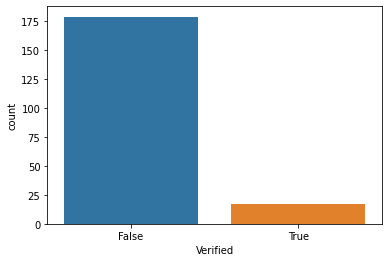

In [32]:
bar = sns.countplot(df['Verified'])

In [33]:
df['Verified'].value_counts()

False    179
True      17
Name: Verified, dtype: int64

In [34]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

thetribunechd      3
SwarajyaMag        2
TOIDelhi           2
TOICitiesNews      2
AAPInNews          1
ThePrintIndia      1
TimesNow           1
ndtv               1
ndtvfeed           1
Radhika_Khera      1
ETEnergyWorld      1
VijayIndrSingla    1
Name: User, dtype: int64

In [35]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 9, 16: 26, 17: 39, 18: 46, 19: 25, 20: 26, 21: 25})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

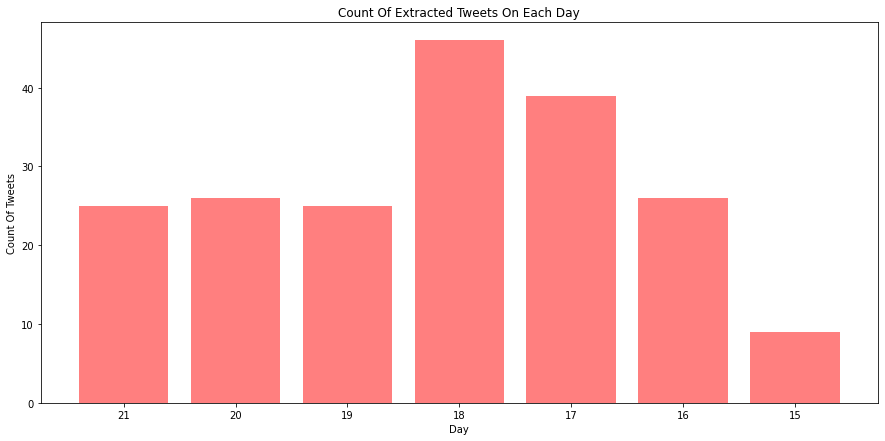

In [36]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [37]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 4,
         1: 6,
         2: 3,
         3: 2,
         4: 8,
         5: 8,
         6: 5,
         7: 7,
         8: 13,
         9: 14,
         10: 7,
         11: 11,
         12: 9,
         13: 13,
         14: 21,
         15: 18,
         16: 17,
         17: 8,
         18: 7,
         19: 5,
         20: 1,
         21: 3,
         22: 2,
         23: 4})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

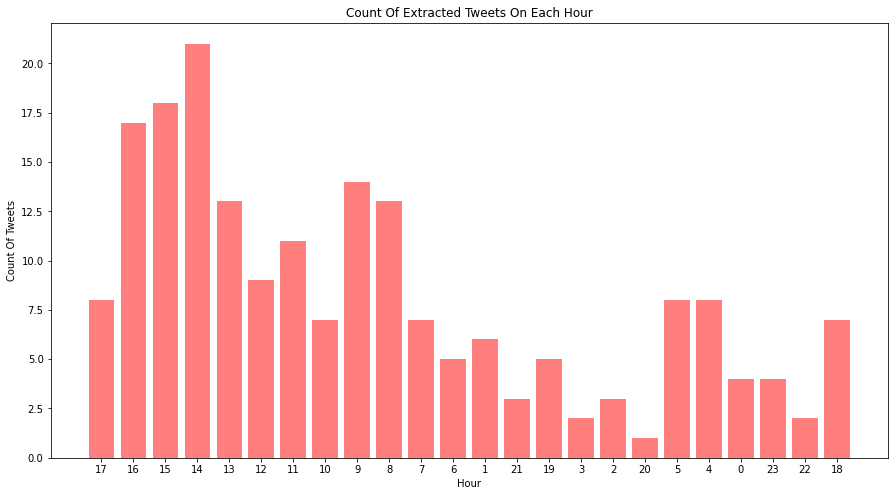

In [38]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [39]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['again', "aren't", 'why', 'ours', 'or', 'did', 'how', 'has', 'are', 'ourselves', "don't", 'no', 'will', "she's", 'who', 'what', 'while', 'myself', 'hadn', 'doesn', 'nor', 'under', "should've", 'below', 'weren', 'in', 'having', 'shan', 'aren', 'being', 'than', 'own', "that'll", 'above', "couldn't", 'shouldn', 'won', 'him', 'does', 'herself', 'same', 'ma', 'needn', 'his', 'is', "won't", 'm', "wouldn't", 'my', "weren't", "haven't", 'the', 'over', 'for', 'those', 'here', 'on', 'he', 'hasn', 'where', 'both', 'at', "you're", 'into', 'about', 've', 'themselves', 'then', 're', 'do', "mustn't", 'during', 'any', "hasn't", 'off', 'ain', 'if', 'and', "doesn't", 's', 'that', 'as', 'against', 'have', 'me', 'up', 'after', 'from', 'because', 'a', 'doing', 'yourself', "you'll", 'itself', 'our', 'their', 'when', 'y', 'few', 'am', 'himself', 'can', 'its', 'there', 'didn', 'not', 'we', 'you', 'such', "didn't", 'mightn', 'which', 'yours', 'it', "you've", 'too', 'should', 'this', 'whom', 'her', 'these', 'l

In [42]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      encouraging congress maybe clueless try hard b...
1      punjab aap need develop leaders create healthy...
2      must watchaap punjab mp exposes bjp sad congre...
3      met many people ground today people told one t...
4      aap punjab youth wing president mla ji corrupt...
                             ...                        
191    pollution isnt good go things actually pollute...
192    player apko jab lagta h sidnaz engagement kam ...
193    new party h bhai formed chunav ladne jeetne k ...
194    crucial year aap wins uttarakhand goa punjab a...
195             evm congress punjab maharastra aap delhi
Name: Processed_Tweet, Length: 196, dtype: object

In [43]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [encouraging, congress, maybe, clueless, try, ...
1      [punjab, aap, need, develop, leaders, create, ...
2      [must, watchaap, punjab, mp, exposes, bjp, sad...
3      [met, many, people, ground, today, people, tol...
4      [aap, punjab, youth, wing, president, mla, ji,...
                             ...                        
191    [pollution, isnt, good, go, things, actually, ...
192    [player, apko, jab, lagta, h, sidnaz, engageme...
193    [new, party, h, bhai, formed, chunav, ladne, j...
194    [crucial, year, aap, wins, uttarakhand, goa, p...
195      [evm, congress, punjab, maharastra, aap, delhi]
Name: Processed_Tweet, Length: 196, dtype: object

In [44]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [encourag, congress, mayb, clueless, tri, hard...
1      [punjab, aap, need, develop, leader, creat, he...
2      [must, watchaap, punjab, mp, expos, bjp, sad, ...
3      [met, mani, peopl, ground, today, peopl, told,...
4      [aap, punjab, youth, wing, presid, mla, ji, co...
                             ...                        
191    [pollut, isnt, good, go, thing, actual, pollut...
192    [player, apko, jab, lagta, h, sidnaz, engag, k...
193    [new, parti, h, bhai, form, chunav, ladn, jeet...
194    [crucial, year, aap, win, uttarakhand, goa, pu...
195      [evm, congress, punjab, maharastra, aap, delhi]
Name: Processed_Tweet, Length: 196, dtype: object

In [45]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 17:33:51,1330202780590628864,False,@DaaruBaazMehta Encouraging. Congress maybe cl...,AamIndian_1,,Twitter for Android,2,1520,1133,1,"[encourag, congress, mayb, clueless, tri, hard..."
1,2020-11-21 16:15:20,1330183020658249730,False,@spiritneeraj @AnmolGaganMan Punjab AAP need t...,Gurwinderr1983,,Twitter for Android,0,349,853,0,"[punjab, aap, need, develop, leader, creat, he..."
2,2020-11-21 16:11:07,1330181958211670017,False,MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...,AapActive123,"Dilshad Garden, New Delhi",Twitter for Android,0,1888,370,0,"[must, watchaap, punjab, expos, bjp, sad, cong..."
3,2020-11-21 15:59:52,1330179129233334273,False,Met many people on ground today 90% people tol...,Aditya37020727,,Twitter Web App,39,72,15,14,"[met, mani, peopl, ground, today, peopl, told,..."
4,2020-11-21 15:45:41,1330175558022520839,False,AAP Punjab youth wing president And MLA @meet_...,Gurdeepgurus,,Twitter for Android,42,1052,480,20,"[aap, punjab, youth, wing, presid, mla, corrup..."
...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-11-15 14:52:00,1327987723106349056,False,"@artijourno 1. If pollution isn’t good, go aft...",Doubledecacorn,🐅🐘🦁,Twitter Web App,0,587,1033,0,"[pollut, isnt, good, thing, actual, pollut, le..."
192,2020-11-15 14:49:39,1327987130677690370,False,@sidharth_shukla you are a player. Apko jab la...,Reva67229646,,Twitter Web App,1,0,1,0,"[player, apko, jab, lagta, sidnaz, engag, kam,..."
193,2020-11-15 14:35:13,1327983499354066944,False,@Astute_Dopey @ng_p_f @TheMohil8 @ANI New part...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[new, parti, bhai, form, chunav, ladn, jeetn, ..."
194,2020-11-15 14:18:06,1327979191183110145,False,@ng_p_f @TheMohil8 @ANI 2022 is crucial year. ...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[crucial, year, aap, win, uttarakhand, goa, pu..."


In [46]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3449

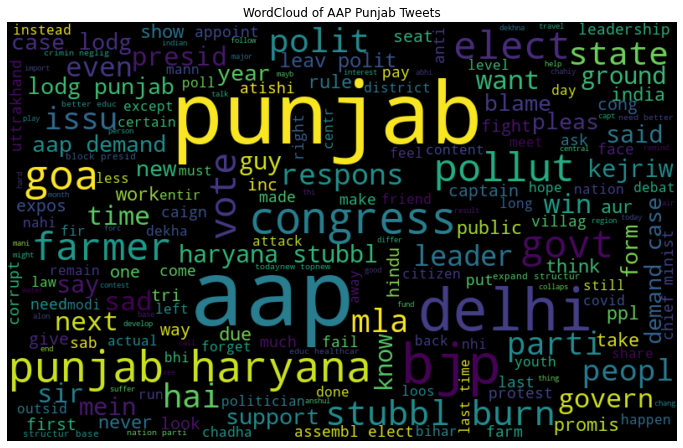

In [47]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of AAP Punjab Tweets")
plt.show()

In [48]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

196

In [49]:
len(text)

3449

In [50]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 66
Negative Tweets: 49
Neutral Tweets 81


In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [53]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.238,0.610,0.152,-0.1027
1,0.000,0.800,0.200,0.3612
2,0.412,0.588,0.000,-0.8442
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
191,0.218,0.782,0.000,-0.6604
192,0.000,0.742,0.258,0.8442
193,0.059,0.864,0.077,0.1531
194,0.187,0.639,0.174,0.1779


In [54]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.238,0.610,0.152,-0.1027,Negative
1,0.000,0.800,0.200,0.3612,Positive
2,0.412,0.588,0.000,-0.8442,Negative
3,0.000,1.000,0.000,0.0000,Neutral
4,0.000,1.000,0.000,0.0000,Neutral


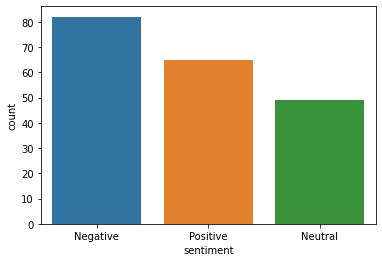

In [56]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [57]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Punjab/AAP_Punjab.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

343

In [58]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [59]:
word_emotion=dict()
for i in range(0,343):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

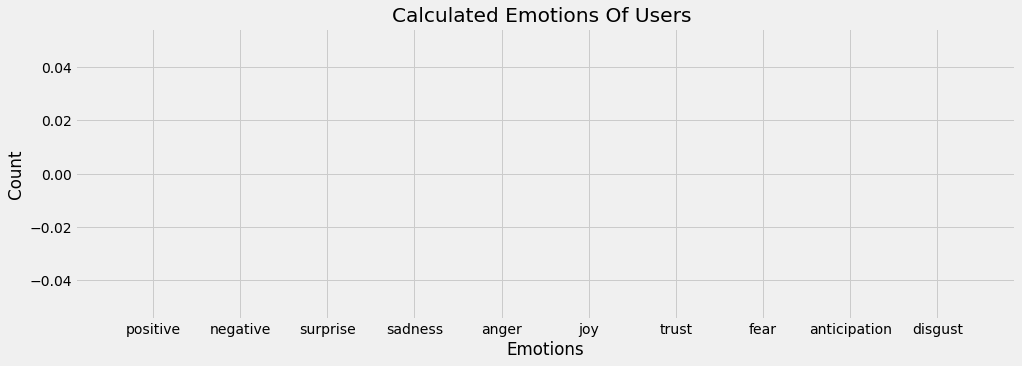

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [60]:
df.Location  = df.Location.fillna('India')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [61]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     78
India                24
New Delhi, India      8
Chandigarh            8
Punjab, India         5
                     ..
Dandeli               1
United Kingdom        1
Karnataka             1
kotputli, jaipur      1
Indore, India         1
Name: Location, Length: 70, dtype: int64

In [62]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 17:33:51,1330202780590628864,False,@DaaruBaazMehta Encouraging. Congress maybe cl...,AamIndian_1,,Twitter for Android,2,1520,1133,1,"[encourag, congress, mayb, clueless, tri, hard...",
1,2020-11-21 16:15:20,1330183020658249730,False,@spiritneeraj @AnmolGaganMan Punjab AAP need t...,Gurwinderr1983,,Twitter for Android,0,349,853,0,"[punjab, aap, need, develop, leader, creat, he...",
2,2020-11-21 16:11:07,1330181958211670017,False,MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...,AapActive123,"Dilshad Garden, New Delhi",Twitter for Android,0,1888,370,0,"[must, watchaap, punjab, expos, bjp, sad, cong...",Dilshad Garden
3,2020-11-21 15:59:52,1330179129233334273,False,Met many people on ground today 90% people tol...,Aditya37020727,,Twitter Web App,39,72,15,14,"[met, mani, peopl, ground, today, peopl, told,...",
4,2020-11-21 15:45:41,1330175558022520839,False,AAP Punjab youth wing president And MLA @meet_...,Gurdeepgurus,,Twitter for Android,42,1052,480,20,"[aap, punjab, youth, wing, presid, mla, corrup...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-11-15 14:52:00,1327987723106349056,False,"@artijourno 1. If pollution isn’t good, go aft...",Doubledecacorn,🐅🐘🦁,Twitter Web App,0,587,1033,0,"[pollut, isnt, good, thing, actual, pollut, le...",🐅🐘🦁
192,2020-11-15 14:49:39,1327987130677690370,False,@sidharth_shukla you are a player. Apko jab la...,Reva67229646,,Twitter Web App,1,0,1,0,"[player, apko, jab, lagta, sidnaz, engag, kam,...",
193,2020-11-15 14:35:13,1327983499354066944,False,@Astute_Dopey @ng_p_f @TheMohil8 @ANI New part...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[new, parti, bhai, form, chunav, ladn, jeetn, ...",
194,2020-11-15 14:18:06,1327979191183110145,False,@ng_p_f @TheMohil8 @ANI 2022 is crucial year. ...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[crucial, year, aap, win, uttarakhand, goa, pu...",


In [63]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [64]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 17:33:51,1330202780590628864,False,@DaaruBaazMehta Encouraging. Congress maybe cl...,AamIndian_1,,Twitter for Android,2,1520,1133,1,"[encourag, congress, mayb, clueless, tri, hard...",,Negative,21
1,2020-11-21 16:15:20,1330183020658249730,False,@spiritneeraj @AnmolGaganMan Punjab AAP need t...,Gurwinderr1983,,Twitter for Android,0,349,853,0,"[punjab, aap, need, develop, leader, creat, he...",,Positive,21
2,2020-11-21 16:11:07,1330181958211670017,False,MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...,AapActive123,"Dilshad Garden, New Delhi",Twitter for Android,0,1888,370,0,"[must, watchaap, punjab, expos, bjp, sad, cong...",Dilshad Garden,Negative,21
3,2020-11-21 15:59:52,1330179129233334273,False,Met many people on ground today 90% people tol...,Aditya37020727,,Twitter Web App,39,72,15,14,"[met, mani, peopl, ground, today, peopl, told,...",,Neutral,21
4,2020-11-21 15:45:41,1330175558022520839,False,AAP Punjab youth wing president And MLA @meet_...,Gurdeepgurus,,Twitter for Android,42,1052,480,20,"[aap, punjab, youth, wing, presid, mla, corrup...",,Neutral,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


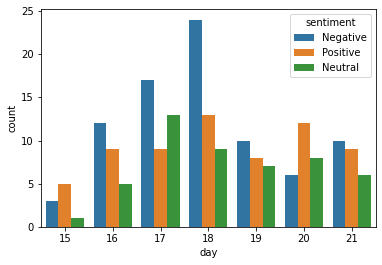

In [65]:
sns.countplot(df['day'],hue = df['sentiment'])

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [67]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 17:33:51,1330202780590628864,False,@DaaruBaazMehta Encouraging. Congress maybe cl...,AamIndian_1,,Twitter for Android,2,1520,1133,1,"[encourag, congress, mayb, clueless, tri, hard...",,Negative,21,0
1,2020-11-21 16:15:20,1330183020658249730,False,@spiritneeraj @AnmolGaganMan Punjab AAP need t...,Gurwinderr1983,,Twitter for Android,0,349,853,0,"[punjab, aap, need, develop, leader, creat, he...",,Positive,21,2
2,2020-11-21 16:11:07,1330181958211670017,False,MUST WATCH\n\nAAP Punjab MP @BhagwantMann Expo...,AapActive123,"Dilshad Garden, New Delhi",Twitter for Android,0,1888,370,0,"[must, watchaap, punjab, expos, bjp, sad, cong...",Dilshad Garden,Negative,21,0
3,2020-11-21 15:59:52,1330179129233334273,False,Met many people on ground today 90% people tol...,Aditya37020727,,Twitter Web App,39,72,15,14,"[met, mani, peopl, ground, today, peopl, told,...",,Neutral,21,1
4,2020-11-21 15:45:41,1330175558022520839,False,AAP Punjab youth wing president And MLA @meet_...,Gurdeepgurus,,Twitter for Android,42,1052,480,20,"[aap, punjab, youth, wing, presid, mla, corrup...",,Neutral,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-11-15 14:52:00,1327987723106349056,False,"@artijourno 1. If pollution isn’t good, go aft...",Doubledecacorn,🐅🐘🦁,Twitter Web App,0,587,1033,0,"[pollut, isnt, good, thing, actual, pollut, le...",🐅🐘🦁,Negative,15,0
192,2020-11-15 14:49:39,1327987130677690370,False,@sidharth_shukla you are a player. Apko jab la...,Reva67229646,,Twitter Web App,1,0,1,0,"[player, apko, jab, lagta, sidnaz, engag, kam,...",,Positive,15,2
193,2020-11-15 14:35:13,1327983499354066944,False,@Astute_Dopey @ng_p_f @TheMohil8 @ANI New part...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[new, parti, bhai, form, chunav, ladn, jeetn, ...",,Positive,15,2
194,2020-11-15 14:18:06,1327979191183110145,False,@ng_p_f @TheMohil8 @ANI 2022 is crucial year. ...,Honestpoliticss,,Twitter Web App,0,10,27,0,"[crucial, year, aap, win, uttarakhand, goa, pu...",,Positive,15,2


In [68]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [70]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [71]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [72]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.576271186440678
Precision Score:  0.576271186440678
Recall Score:  0.576271186440678
F1 Score:  0.576271186440678


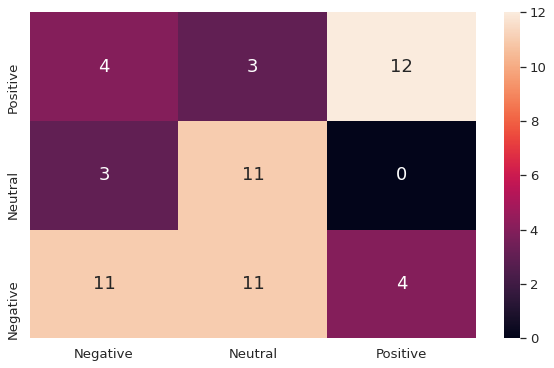

In [73]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [ ]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [74]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [75]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4895604395604396
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [76]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.423728813559322
Precision Score:  0.423728813559322
Recall Score:  0.423728813559322
F1 Score:  0.423728813559322


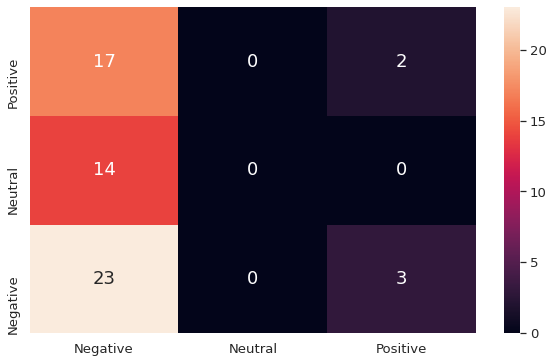

In [77]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [78]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [79]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.5084745762711864
Precision Score:  0.5084745762711864
Recall Score:  0.5084745762711864
F1 Score:  0.5084745762711864


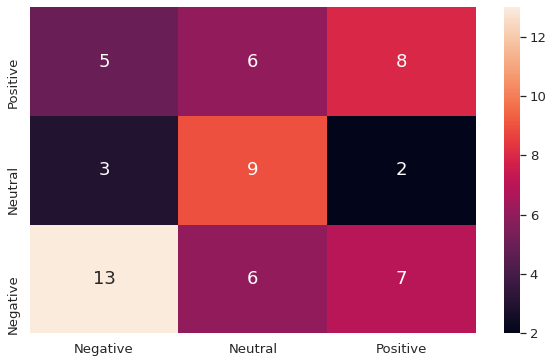

In [80]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [81]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [82]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1400, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1400, max_depth=19, criterion=gini, score=0.571, total=   2.1s
[CV] n_estimators=1400, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=19, criterion=gini, score=0.607, total=   2.1s
[CV] n_estimators=1400, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=19, criterion=gini, score=0.630, total=   2.1s
[CV] n_estimators=1400, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=19, criterion=gini, score=0.556, total=   2.1s
[CV] n_estimators=1400, max_depth=19, criterion=gini .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.6s remaining:    0.0s


[CV]  n_estimators=1400, max_depth=19, criterion=gini, score=0.444, total=   2.2s
[CV] n_estimators=500, max_depth=4, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=entropy, score=0.500, total=   0.7s
[CV] n_estimators=500, max_depth=4, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=entropy, score=0.500, total=   0.7s
[CV] n_estimators=500, max_depth=4, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   12.1s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=entropy, score=0.444, total=   0.7s
[CV] n_estimators=500, max_depth=4, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.8s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=entropy, score=0.481, total=   0.7s
[CV] n_estimators=500, max_depth=4, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.5s remaining:    0.0s


[CV]  n_estimators=500, max_depth=4, criterion=entropy, score=0.481, total=   0.7s
[CV] n_estimators=300, max_depth=15, criterion=gini ..................
[CV]  n_estimators=300, max_depth=15, criterion=gini, score=0.571, total=   0.4s
[CV] n_estimators=300, max_depth=15, criterion=gini ..................
[CV]  n_estimators=300, max_depth=15, criterion=gini, score=0.607, total=   0.5s
[CV] n_estimators=300, max_depth=15, criterion=gini ..................
[CV]  n_estimators=300, max_depth=15, criterion=gini, score=0.556, total=   0.5s
[CV] n_estimators=300, max_depth=15, criterion=gini ..................
[CV]  n_estimators=300, max_depth=15, criterion=gini, score=0.556, total=   0.5s
[CV] n_estimators=300, max_depth=15, criterion=gini ..................
[CV]  n_estimators=300, max_depth=15, criterion=gini, score=0.519, total=   0.5s
[CV] n_estimators=200, max_depth=17, criterion=gini ..................
[CV]  n_estimators=200, max_depth=17, criterion=gini, score=0.571, total=   0.3s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


0.5764550264550264
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [83]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5423728813559322
Precision Score:  0.5423728813559322
Recall Score:  0.5423728813559322
F1 Score:  0.5423728813559322


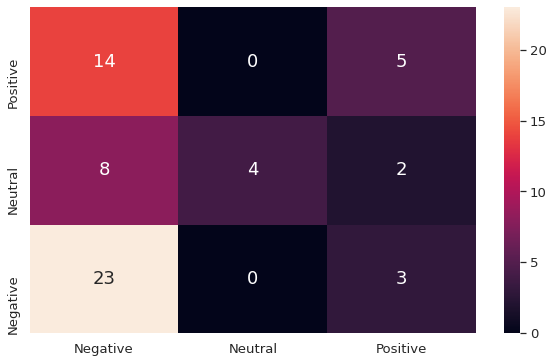

In [84]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [85]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.5254237288135594
Precision Score:  0.5254237288135594
Recall Score:  0.5254237288135594
F1 Score:  0.5254237288135594


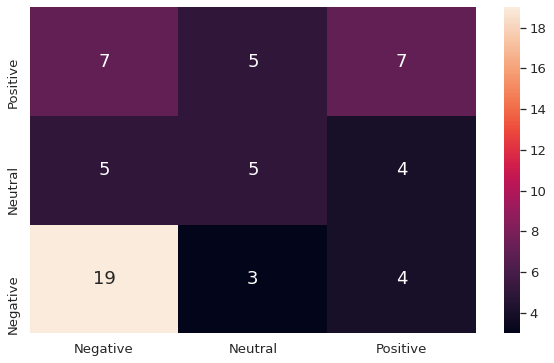

In [86]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [87]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [89]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5247252747252747
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [90]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.5254237288135594
Precision Score:  0.5254237288135594
Recall Score:  0.5254237288135594
F1 Score:  0.5254237288135594


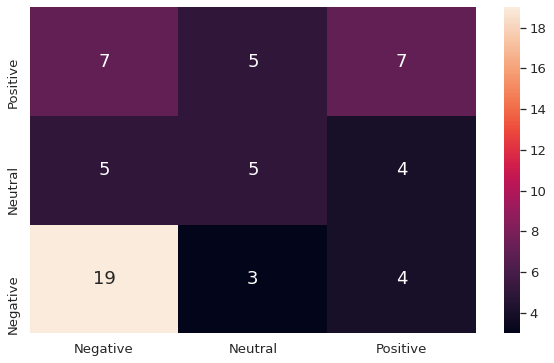

In [91]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

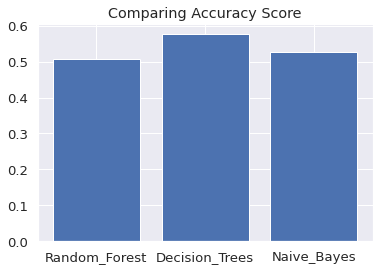

In [92]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

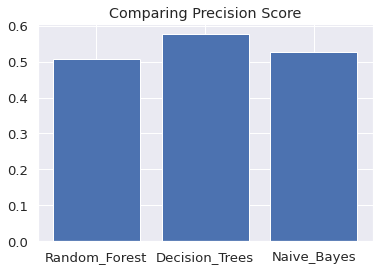

In [93]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

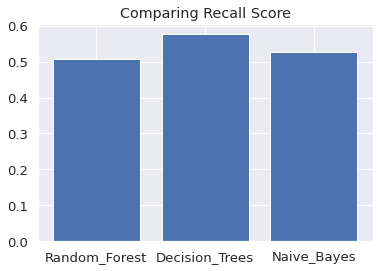

In [94]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

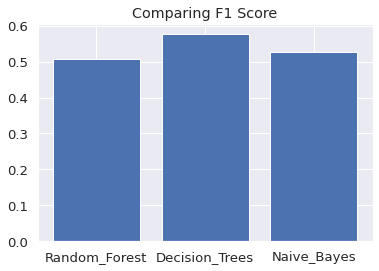

In [95]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()